In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Loading the dataset
test_data = pd.read_csv('TargetData.csv')

#Print the first 5 rows of the dataframe.
test_data.head()

X = test_data.drop(["ID","SB","COL","Margin","Block","ROW"],axis = 1)
y = test_data.SB

In [5]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=2, stratify=y)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.824
Accuracy on test set: 0.821


In [6]:
y_pred = dt.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[471  57]
 [128 375]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       528
           1       0.87      0.75      0.80       503

    accuracy                           0.82      1031
   macro avg       0.83      0.82      0.82      1031
weighted avg       0.83      0.82      0.82      1031



In [7]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=900'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

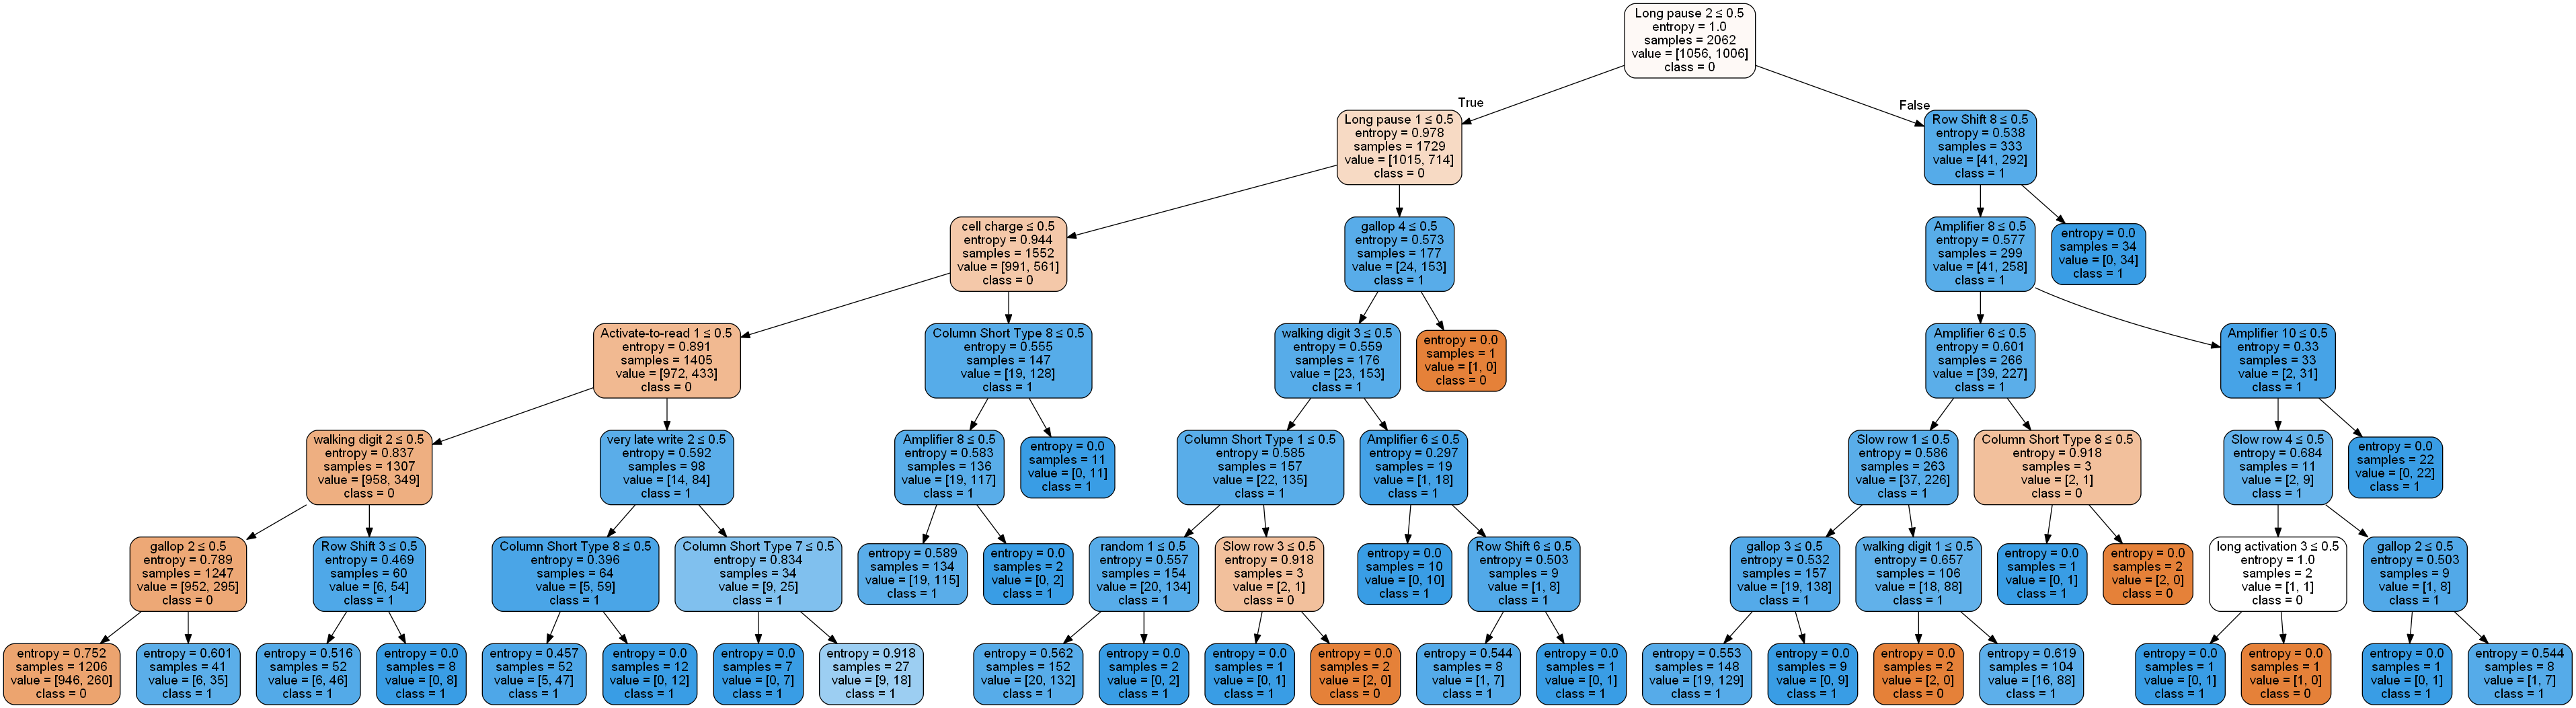

In [8]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

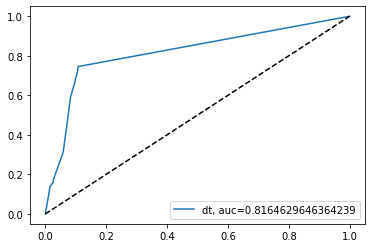

In [9]:
from sklearn import metrics

y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [10]:
print(dt.feature_importances_)

[1.78705552e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.39819522e-03 0.00000000e+00 1.20566796e-03
 0.00000000e+00 1.69723360e-01 1.35789857e-01 7.15061938e-03
 1.11290850e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.59717050e-01 0.00000000e+00 7.19072131e-02 0.00000000e+00
 0.00000000e+00 3.74851555e-03 0.00000000e+00 1.37138798e-03
 2.35166076e-03 0.00000000e+00 1.78316241e-03 5.50009910e-04
 1.35400792e-03 3.95827085e-03 0.00000000e+00 5.88017908e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.72135653e-03 5.70154232e-03
 0.00000000e+00 4.83587686e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.75545519e-03 0.00000000e+00
 8.99587774e-03 2.46023513e-04 0.00000000e+00 4.57255595e-03
 0.00000000e+00 9.28575338e-03]


In [11]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Iteration 1, loss = 0.74809097
Iteration 2, loss = 0.68022641
Iteration 3, loss = 0.63901330
Iteration 4, loss = 0.61183093
Iteration 5, loss = 0.59134409
Iteration 6, loss = 0.57467845
Iteration 7, loss = 0.56030962
Iteration 8, loss = 0.54755974
Iteration 9, loss = 0.53610858
Iteration 10, loss = 0.52423083
Iteration 11, loss = 0.51299684
Iteration 12, loss = 0.50252681
Iteration 13, loss = 0.49250785
Iteration 14, loss = 0.48327480
Iteration 15, loss = 0.47443807
Iteration 16, loss = 0.46578028
Iteration 17, loss = 0.45795004
Iteration 18, loss = 0.45085349
Iteration 19, loss = 0.44596000
Iteration 20, loss = 0.43975486
Iteration 21, loss = 0.43465765
Iteration 22, loss = 0.43073334
Iteration 23, loss = 0.42657282
Iteration 24, loss = 0.42373703
Iteration 25, loss = 0.42051143
Iteration 26, loss = 0.41765021
Iteration 27, loss = 0.41551082
Iteration 28, loss = 0.41348610
Iteration 29, loss = 0.41215793
Iteration 30, loss = 0.41043853
Iteration 31, loss = 0.40883992
Iteration 32, los

Iteration 256, loss = 0.36714771
Iteration 257, loss = 0.36789389
Iteration 258, loss = 0.36844016
Iteration 259, loss = 0.36752514
Iteration 260, loss = 0.36663573
Iteration 261, loss = 0.36629366
Iteration 262, loss = 0.36648215
Iteration 263, loss = 0.36636121
Iteration 264, loss = 0.36650610
Iteration 265, loss = 0.36635495
Iteration 266, loss = 0.36604822
Iteration 267, loss = 0.36578429
Iteration 268, loss = 0.36586093
Iteration 269, loss = 0.36594141
Iteration 270, loss = 0.36579275
Iteration 271, loss = 0.36579273
Iteration 272, loss = 0.36567188
Iteration 273, loss = 0.36570811
Iteration 274, loss = 0.36534500
Iteration 275, loss = 0.36634232
Iteration 276, loss = 0.36525357
Iteration 277, loss = 0.36570103
Iteration 278, loss = 0.36599830
Iteration 279, loss = 0.36510747
Iteration 280, loss = 0.36520540
Iteration 281, loss = 0.36523873
Iteration 282, loss = 0.36500638
Iteration 283, loss = 0.36559509
Iteration 284, loss = 0.36509120
Iteration 285, loss = 0.36429007
Iteration 

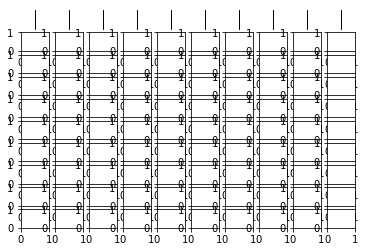

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier




fig, axes = plt.subplots(10, 10)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(58,1), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()